In [119]:
import pandas as pd

# Read the CSV file with the correct delimiter
try:
    data = pd.read_csv('testkarachi_homes1-730.csv', delimiter='|', on_bad_lines='skip')
    print(data.head())
    print(data.columns)  # Inspect the columns
    
    # Ensure there are at least 7 columns to rename
    if len(data.columns) >= 7:
        # Rename only the first 7 columns
        split_columns = data.iloc[:, :7]  # Take only the first 7 columns
        split_columns.columns = ['Location', 'Price', 'Bedrooms', 'Baths', 'Size', 'Image', 'Description']

        # Display the new DataFrame structure
        print(split_columns.head())

        # Save the newly structured DataFrame to a new CSV file
        new_csv = 'karachi_cleaned.csv'
        split_columns.to_csv(new_csv, index=False)

        print(f"Structured data saved to {new_csv}")
    else:
        print("The CSV file does not contain at least 7 columns to rename.")

except pd.errors.ParserError as e:
    print("ParserError:", e)
except FileNotFoundError:
    print("The specified CSV file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


The specified CSV file was not found.


In [120]:
df = pd.read_csv("karachi_cleaned.csv")
df.head()

,Location,Price,Bedrooms,Baths,Size,Image,Description
0,"Askari 5 - Sector F, Askari 5",45000000,3,3,2403.0000,https://media.zameen.com/thumbnails/257046245-400x300.jpeg,"Brand New 2400 Square Feet 3 Bedroom Park Facing Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room & Servant Quarter is available for Sale in Askari-V, Malir Cantt Karachi. Located right next to Check Post 5 (Walking Distance) with all amenities nearby."
1,"Askari 5 - Sector J, Askari 5",45000000,3,4,2502.0000,https://media.zameen.com/thumbnails/257147196-400x300.jpeg,"Brand New 3 Bedroom Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room, Servant Quarter & Covered Parking For Sale In Sector-J, Askari-V, Malir Cantt Karachi"
2,"Falcon Complex New Malir, Malir",98000000,5,5,4500.0000,https://media.zameen.com/thumbnails/257886252-400x300.jpeg,"You can book your House today at an ideal price of PKR Rs. 98,000,000. New house for sale have just popped up, so book an appointment today to find your dream home. Make the most of the opportunity right now of buying a 500 Square Yards property that is readily. This property at Rs. 98,000,000 comes with modern features and latest fittings. With property in Falcon Complex New Malir, you'll live the life of your dreams. Karachi finest property options that fit right into your budget. Read below to find out what this property offers. A private dining room is also included in the property to allow you to have your meals in peace and harmony. You don't have to worry about space anymore with the expansive sitting room that is part of this property. This drawing room lets your family have their privacy while you have formal guests over. The House is smartly designed to include a study room with all the ergonomics in place. Your kids can play to their heart's content in the play area adjoining the property. An effective waste disposal system is in place to keep the surroundings neat and tidy. For complete information about the property, contact us today and our representative will guide you."
3,"Falcon Complex New Malir, Malir",130000000,5,5,4500.0000,https://media.zameen.com/thumbnails/245978731-400x300.jpeg,"If you want to buy a property then don't miss out on this opportunity. Falcon Complex New Malir is trending in top searches for a home location, so make a move today to benefit. This 500 Square Yards House is the best real estate asset you can purchase at the moment. Finding a property is difficult but one at RsView Contact Detailis a great offer. If Karachi is your new investment destination, we have the right property for you. By considering the fact you're looking for a House, we would say, your search is now over. Features of property as follow. Feeling stressed? Simply step into the steam room that is part of the House for a few minutes. Plant your favorite fruits and vegetable in the garden, and enjoy them fresh at home. The property has a spacious drawing and dining room to allow you to entertain in style. The sitting room in this listing is perfect for informal gatherings. Large landscaped garden area in the House, where you can set up a coffee table or some sun loungers. Stay connected with your family and friends with the facility of broadband internet access. Kids can freely play at the community garden nearby. You can contact on our given details below to book your appointment."
4,"Falcon Complex New Malir, Malir",81000000,4,5,3150.0000,https://media.zameen.com/thumbnails/260397643-400x300.jpeg,Brand New House Latest Design RCC Structured Bungalow On Sale In Falcon Complex New Malir. Ideally Located House With Imported Fixture And Fitting. All Basic Amenities Are Available In The Society. Security Is Under PAF Administration


In [121]:
df.columns

Index(['Location', 'Price', 'Bedrooms', 'Baths', 'Size', 'Image',
       'Description'],
      dtype='object')

In [122]:
df.dtypes

Location       object
Price           int64
                ...  
Image          object
Description    object
Length: 7, dtype: object

In [123]:
df = df.drop("Image", axis=1)

In [124]:
df.dtypes

Location        object
Price            int64
                ...   
Size           float64
Description     object
Length: 6, dtype: object

In [125]:
# Convert the column to respective data types
df['Price'] = df['Price'].astype(float)
df['Bedrooms'] = df['Bedrooms'].astype(float)
df['Baths'] = df['Baths'].astype(float)
df['Size'] = df['Size'].astype(float)
df['Location'] = df['Location'].astype(str)
df['Description'] = df['Description'].astype(str)

In [126]:
df.dtypes

Location        object
Price          float64
                ...   
Size           float64
Description     object
Length: 6, dtype: object

In [127]:
df.head()

,Location,Price,Bedrooms,Baths,Size,Description
0,"Askari 5 - Sector F, Askari 5",45000000.0000,3.0000,3.0000,2403.0000,"Brand New 2400 Square Feet 3 Bedroom Park Facing Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room & Servant Quarter is available for Sale in Askari-V, Malir Cantt Karachi. Located right next to Check Post 5 (Walking Distance) with all amenities nearby."
1,"Askari 5 - Sector J, Askari 5",45000000.0000,3.0000,4.0000,2502.0000,"Brand New 3 Bedroom Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room, Servant Quarter & Covered Parking For Sale In Sector-J, Askari-V, Malir Cantt Karachi"
2,"Falcon Complex New Malir, Malir",98000000.0000,5.0000,5.0000,4500.0000,"You can book your House today at an ideal price of PKR Rs. 98,000,000. New house for sale have just popped up, so book an appointment today to find your dream home. Make the most of the opportunity right now of buying a 500 Square Yards property that is readily. This property at Rs. 98,000,000 comes with modern features and latest fittings. With property in Falcon Complex New Malir, you'll live the life of your dreams. Karachi finest property options that fit right into your budget. Read below to find out what this property offers. A private dining room is also included in the property to allow you to have your meals in peace and harmony. You don't have to worry about space anymore with the expansive sitting room that is part of this property. This drawing room lets your family have their privacy while you have formal guests over. The House is smartly designed to include a study room with all the ergonomics in place. Your kids can play to their heart's content in the play area adjoining the property. An effective waste disposal system is in place to keep the surroundings neat and tidy. For complete information about the property, contact us today and our representative will guide you."
3,"Falcon Complex New Malir, Malir",130000000.0000,5.0000,5.0000,4500.0000,"If you want to buy a property then don't miss out on this opportunity. Falcon Complex New Malir is trending in top searches for a home location, so make a move today to benefit. This 500 Square Yards House is the best real estate asset you can purchase at the moment. Finding a property is difficult but one at RsView Contact Detailis a great offer. If Karachi is your new investment destination, we have the right property for you. By considering the fact you're looking for a House, we would say, your search is now over. Features of property as follow. Feeling stressed? Simply step into the steam room that is part of the House for a few minutes. Plant your favorite fruits and vegetable in the garden, and enjoy them fresh at home. The property has a spacious drawing and dining room to allow you to entertain in style. The sitting room in this listing is perfect for informal gatherings. Large landscaped garden area in the House, where you can set up a coffee table or some sun loungers. Stay connected with your family and friends with the facility of broadband internet access. Kids can freely play at the community garden nearby. You can contact on our given details below to book your appointment."
4,"Falcon Complex New Malir, Malir",81000000.0000,4.0000,5.0000,3150.0000,Brand New House Latest Design RCC Structured Bungalow On Sale In Falcon Complex New Malir. Ideally Located House With Imported Fixture And Fitting. All Basic Amenities Are Available In The Society. Security Is Under PAF Administration


In [128]:
# # Splitting the single column into multiple columns based on the separator "|"
# split_columns = data['location|price|bedrooms|baths|size'].str.split('|', expand=True)
# split_columns.columns = ['Location', 'Price', 'Bedrooms', 'Baths', 'Size']

# # Converting columns to appropriate data types
# split_columns['Price'] = pd.to_numeric(split_columns['Price'].str.replace('[^\d.]', ''), errors='coerce')
# split_columns['Bedrooms'] = pd.to_numeric(split_columns['Bedrooms'], errors='coerce')
# split_columns['Baths'] = pd.to_numeric(split_columns['Baths'], errors='coerce')
# split_columns['Size'] = pd.to_numeric(split_columns['Size'], errors='coerce')

# # Display the structured and typed dataframe
# print(split_columns.head())

# Optionally, save the cleaned and structured data to a new CSV file
cleaned_file_path = './cleaned_khi.csv'
df.to_csv(cleaned_file_path, index=False)


In [129]:
df = pd.read_csv("cleaned_khi.csv")
df.head()

,Location,Price,Bedrooms,Baths,Size,Description
0,"Askari 5 - Sector F, Askari 5",45000000.0000,3.0000,3.0000,2403.0000,"Brand New 2400 Square Feet 3 Bedroom Park Facing Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room & Servant Quarter is available for Sale in Askari-V, Malir Cantt Karachi. Located right next to Check Post 5 (Walking Distance) with all amenities nearby."
1,"Askari 5 - Sector J, Askari 5",45000000.0000,3.0000,4.0000,2502.0000,"Brand New 3 Bedroom Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room, Servant Quarter & Covered Parking For Sale In Sector-J, Askari-V, Malir Cantt Karachi"
2,"Falcon Complex New Malir, Malir",98000000.0000,5.0000,5.0000,4500.0000,"You can book your House today at an ideal price of PKR Rs. 98,000,000. New house for sale have just popped up, so book an appointment today to find your dream home. Make the most of the opportunity right now of buying a 500 Square Yards property that is readily. This property at Rs. 98,000,000 comes with modern features and latest fittings. With property in Falcon Complex New Malir, you'll live the life of your dreams. Karachi finest property options that fit right into your budget. Read below to find out what this property offers. A private dining room is also included in the property to allow you to have your meals in peace and harmony. You don't have to worry about space anymore with the expansive sitting room that is part of this property. This drawing room lets your family have their privacy while you have formal guests over. The House is smartly designed to include a study room with all the ergonomics in place. Your kids can play to their heart's content in the play area adjoining the property. An effective waste disposal system is in place to keep the surroundings neat and tidy. For complete information about the property, contact us today and our representative will guide you."
3,"Falcon Complex New Malir, Malir",130000000.0000,5.0000,5.0000,4500.0000,"If you want to buy a property then don't miss out on this opportunity. Falcon Complex New Malir is trending in top searches for a home location, so make a move today to benefit. This 500 Square Yards House is the best real estate asset you can purchase at the moment. Finding a property is difficult but one at RsView Contact Detailis a great offer. If Karachi is your new investment destination, we have the right property for you. By considering the fact you're looking for a House, we would say, your search is now over. Features of property as follow. Feeling stressed? Simply step into the steam room that is part of the House for a few minutes. Plant your favorite fruits and vegetable in the garden, and enjoy them fresh at home. The property has a spacious drawing and dining room to allow you to entertain in style. The sitting room in this listing is perfect for informal gatherings. Large landscaped garden area in the House, where you can set up a coffee table or some sun loungers. Stay connected with your family and friends with the facility of broadband internet access. Kids can freely play at the community garden nearby. You can contact on our given details below to book your appointment."
4,"Falcon Complex New Malir, Malir",81000000.0000,4.0000,5.0000,3150.0000,Brand New House Latest Design RCC Structured Bungalow On Sale In Falcon Complex New Malir. Ideally Located House With Imported Fixture And Fitting. All Basic Amenities Are Available In The Society. Security Is Under PAF Administration


In [130]:
df.shape

(17106, 6)

In [131]:
df.rename(columns={"Price":"asking_price", "Size" : "size(sqft)"} , inplace=True)

In [132]:
df.head(20)

,Location,asking_price,Bedrooms,Baths,size(sqft),Description
0,"Askari 5 - Sector F, Askari 5",45000000.0000,3.0000,3.0000,2403.0000,"Brand New 2400 Square Feet 3 Bedroom Park Facing Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room & Servant Quarter is available for Sale in Askari-V, Malir Cantt Karachi. Located right next to Check Post 5 (Walking Distance) with all amenities nearby."
1,"Askari 5 - Sector J, Askari 5",45000000.0000,3.0000,4.0000,2502.0000,"Brand New 3 Bedroom Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room, Servant Quarter & Covered Parking For Sale In Sector-J, Askari-V, Malir Cantt Karachi"
...,...,...,...,...,...,...
18,"Gulshan-e-Iqbal - Block 13-D2, Gulshan-e-Iqbal",32500000.0000,6.0000,6.0000,1080.0000,"Ground Plus Two House For Sale (Pictures Are Real)120/Yards LOCATED: Gulshan-e-Iqbal Block 13D-2 Near Hasan square back side railway crossing Waseem Bagh Back Side (Ground Floor 2 bed d d Washing Area Kitchen 1st Floor 2 bed d d Terrace Kitchen 2nd Floor 2 bed lounge n open terrace Roof with shadeGated society)West Open Full Air Ventilation 6Bed D. DAttached Bath Tiles & Marbles Flooring Mix24/Hrs Sweet Water 24/Hrs ElectrictyReady To Move Neat And Clean Environment Bondry Wall Society Big Terrace Security Staff AvailableWell Maintained West OpenLeased Separate EntranceSeparate MetresIdeal Location Features:*Well Maintained House*No Load-shedding Of Electricity &: Gas, sweet Water. American Kitchen*Open Gallery, West Open*All Rooms Have 2 Windows,Fully Airy And Light During Daytime,*Entrance Coverd With Powerful And Secure Grills From The Entrance*Security Guards Are Available At The Main Entrance And are Helpful For Any Assistance. Contact To Visit The Property Location With Family. (Call Before Half An Hour to visit The LocationFor Further Details ContactsElite Estate Agency"
19,"Gulshan-e-Iqbal - Block 13/D-3, Gulshan-e-Iqbal",12500000.0000,2.0000,2.0000,1053.0000,"!Brand New!16th Floor Flat For Sale (Pictures Are Real)LOCATED: Gulshan-e-Iqbal Block 13-E Near Hasan square back side1050/SQ/FTWest Open Full Air Ventilation 2Bed D. DAmerican Kitchen Tiles Flooring !Property Specifications!-2Bedrooms With Attached Bath -Lounge -Drawing Room-Lift Available -Cargo Lift Available -2 Balconys-Swimming Pool-Gym-Park-Majid -Peace Full Environment -Dual Entrance 24/Hrs Water Supply 24/Hrs ElectrictyReady To Move Bondry Wall ProjectNeat And Clean Environment Security Staff AvailableAll Facility On Your Door StepLeased Ideal LocationFeatures:*Well Maintained Flat *No Load-shedding Of Electricity &: Gas, sweet Water. American Kitchen*Gallery, West Open*All Rooms Have 2 Windows,Fully Airy And Light During Daytime,*Entrance Coverd With Powerful And Secure Grills From The Entrance*Security Guards Are Available At The Main Entrance And are Helpful For Any Assistance. Contact To Visit The Property Location With Family. (Call Before Half An Hour to visit The LocationFor Further Details ContactsElite Estate Agency"


Average price for all listings

In [133]:
df["asking_price"].mean()


52215393.19537005

Median price for all listings

In [134]:
df["asking_price"].median()


29500000.0

Mode price for all listings

In [135]:
df["asking_price"].mode()

0   25000000.0000
Name: asking_price, dtype: float64

### Visualization: Show the distribution for house lower than 20 milion   

In [136]:
price_lowerthan=50000000
num_bins=40

In [137]:
!pip install seaborn

/var/folders/y8/x9285djn4dq833k8_7gw_7_00000gn/T/ipykernel_12166/3190041838.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


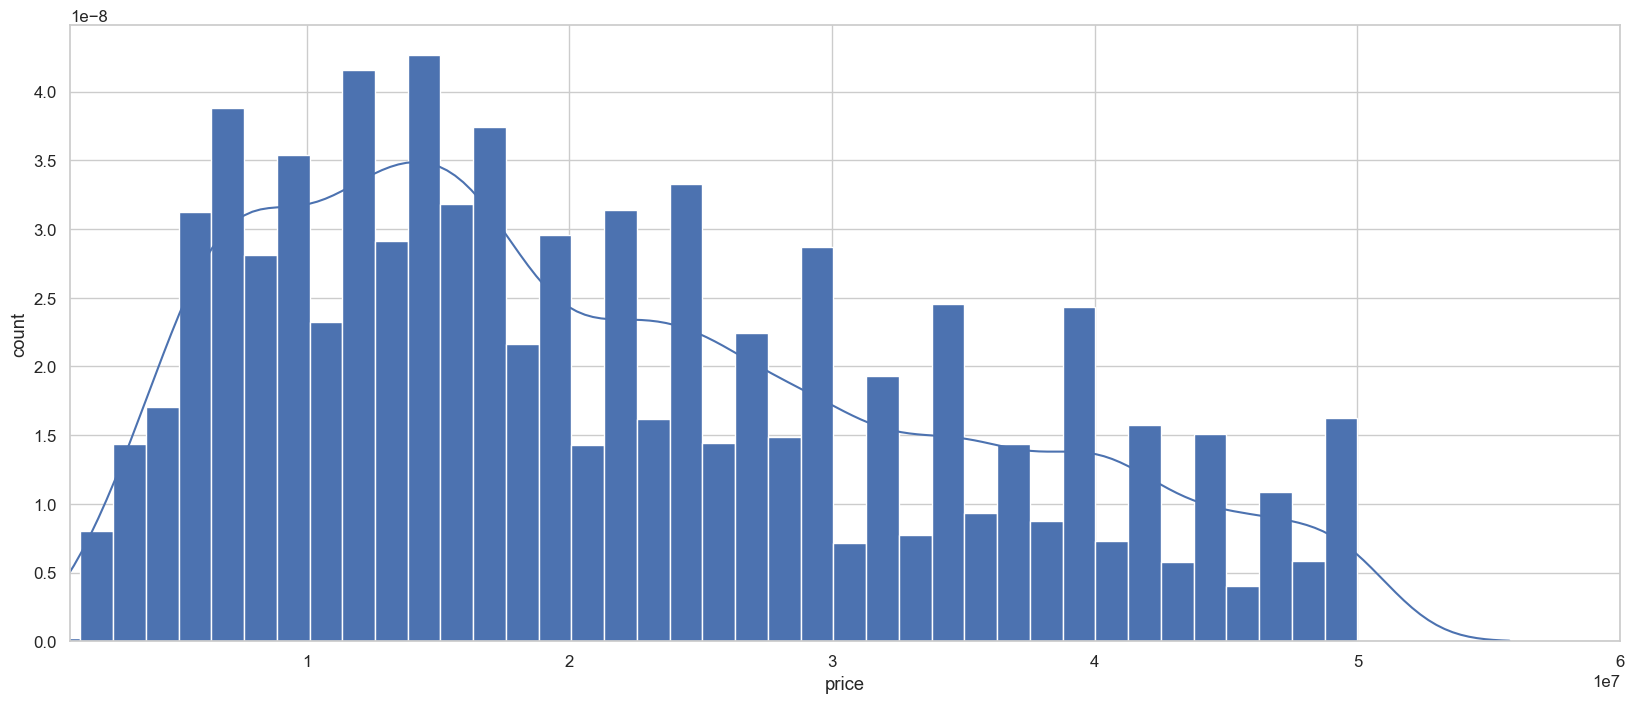

In [138]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 8]})
sns.distplot(
    df[df['asking_price']<=price_lowerthan]['asking_price'], norm_hist=False, kde=True, bins=num_bins, hist_kws={"alpha": 1}).set(xlabel='price', ylabel='count',xlim=(1000000,price_lowerthan+10000000));

## Check the distribution for Bedrooms

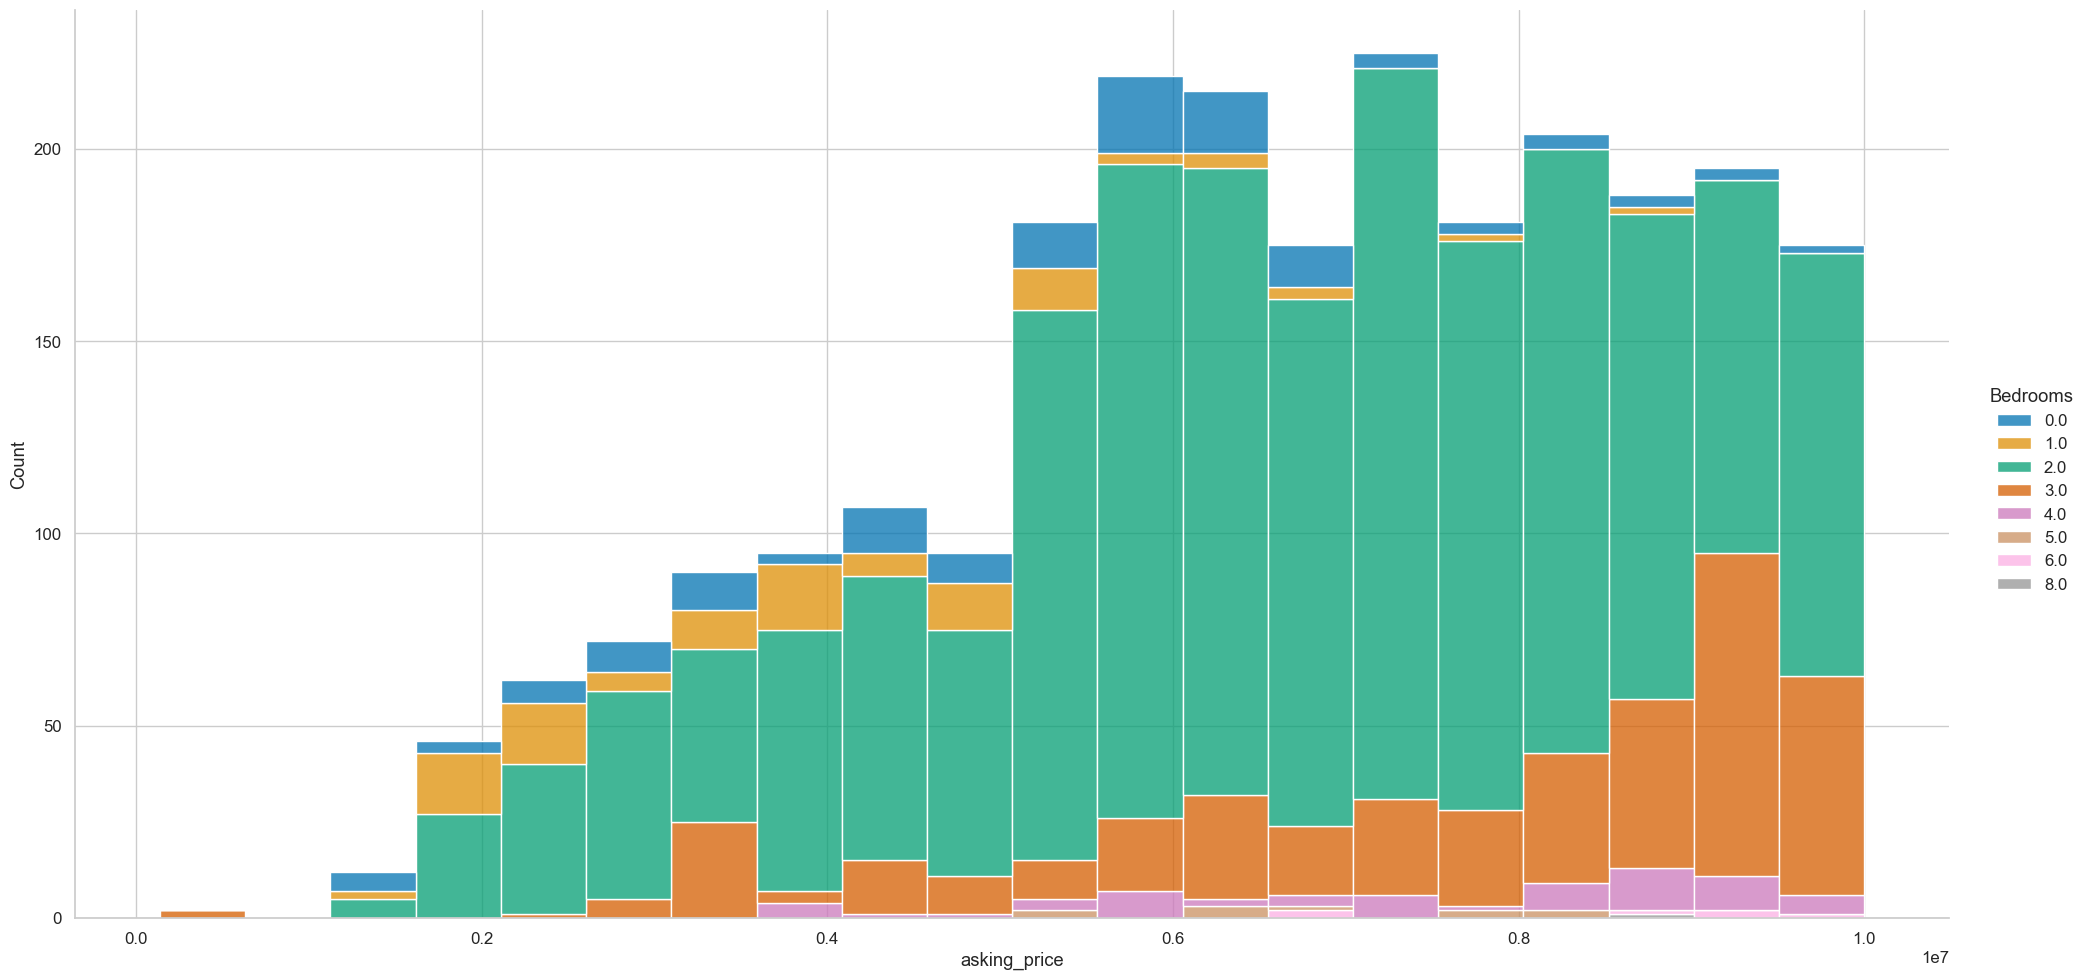

In [139]:
sns.displot(df[df["asking_price"]<=10000000], x="asking_price", hue="Bedrooms", multiple="stack",bins=20,
            height=10, aspect=2, palette='colorblind')

### check bathrooms

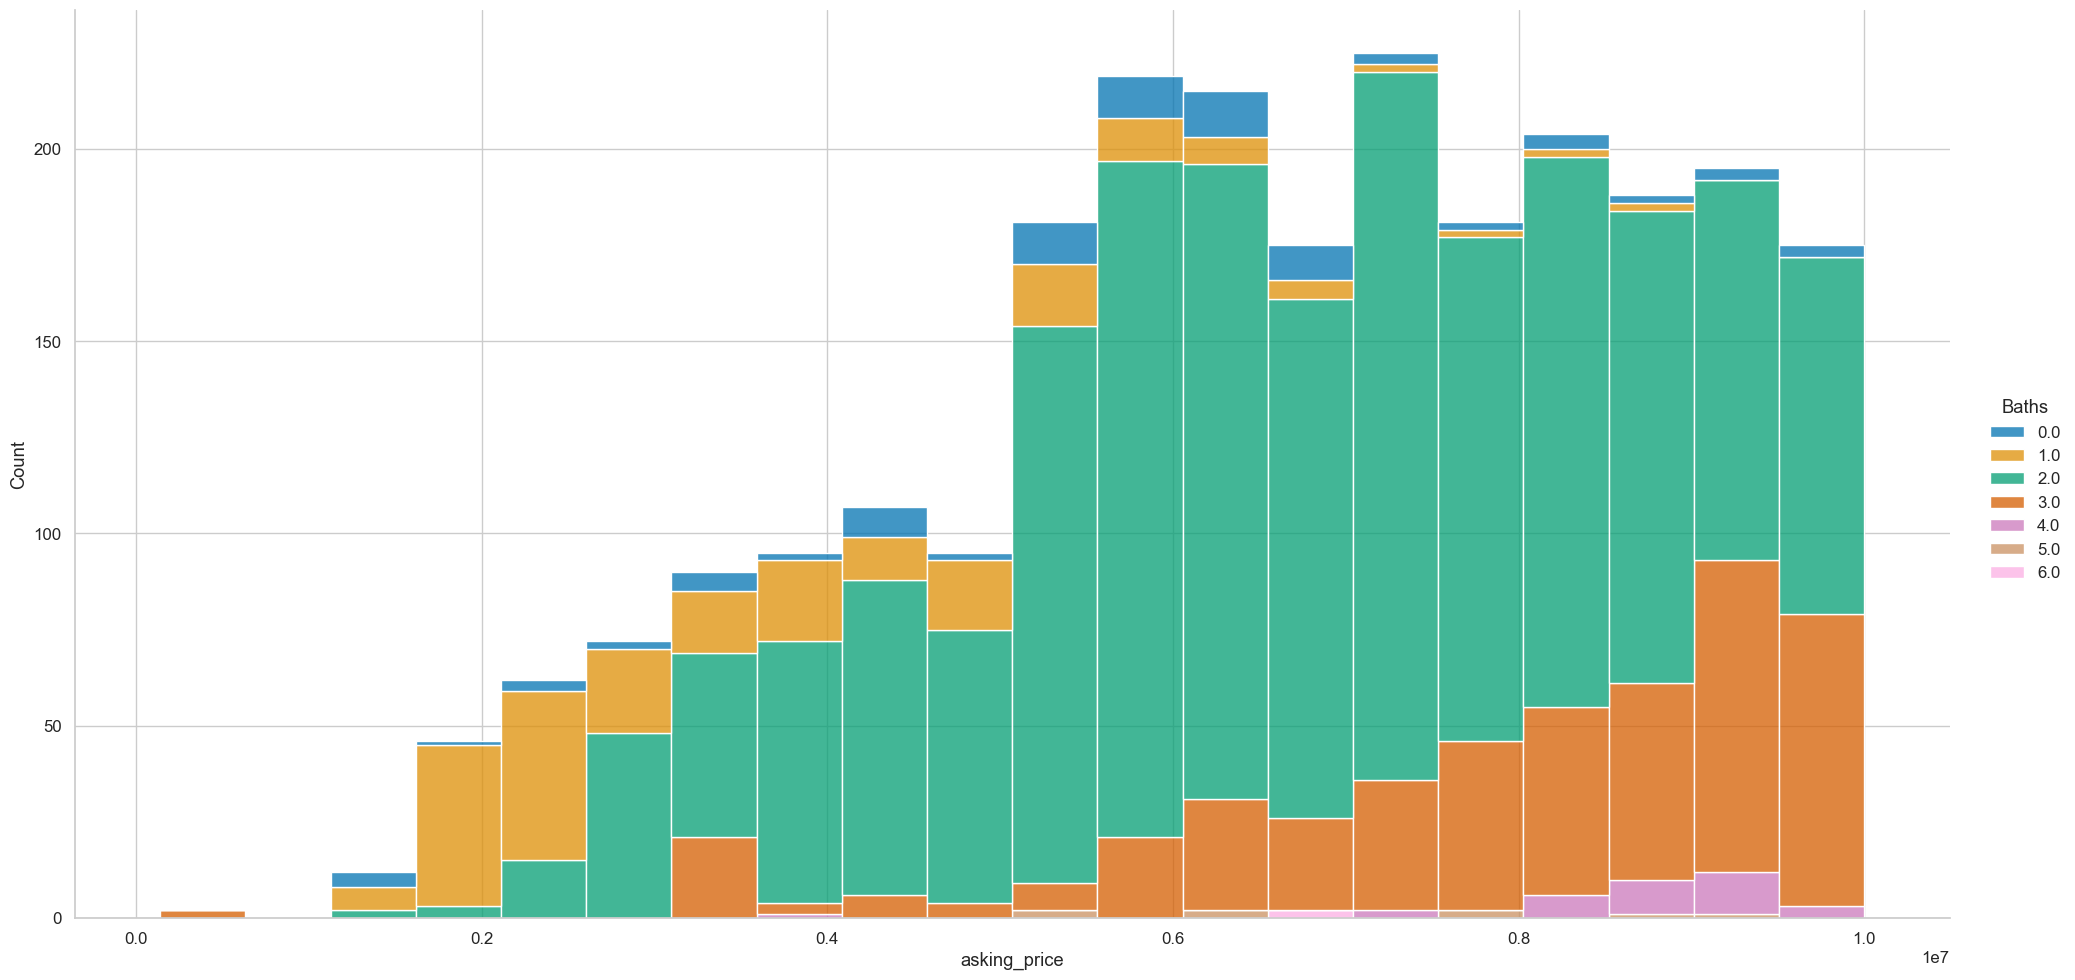

In [140]:
sns.displot(df[df["asking_price"]<=10000000], x="asking_price", hue="Baths", multiple="stack",bins=20,
            height=10, aspect=2, palette='colorblind')

In [141]:
cols = df.columns.tolist()
cols

['Location', 'asking_price', 'Bedrooms', 'Baths', 'size(sqft)', 'Description']

In [142]:
#show full content in description boxes
pd.set_option("display.max_colwidth", None)

In [ ]:
# df.loc[(df['Description'].str.contains('semi-detached', case=False))] = 'Duplex'


In [143]:
df.head()

,Location,asking_price,Bedrooms,Baths,size(sqft),Description
0,"Askari 5 - Sector F, Askari 5",45000000.0000,3.0000,3.0000,2403.0000,"Brand New 2400 Square Feet 3 Bedroom Park Facing Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room & Servant Quarter is available for Sale in Askari-V, Malir Cantt Karachi. Located right next to Check Post 5 (Walking Distance) with all amenities nearby."
1,"Askari 5 - Sector J, Askari 5",45000000.0000,3.0000,4.0000,2502.0000,"Brand New 3 Bedroom Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room, Servant Quarter & Covered Parking For Sale In Sector-J, Askari-V, Malir Cantt Karachi"
2,"Falcon Complex New Malir, Malir",98000000.0000,5.0000,5.0000,4500.0000,"You can book your House today at an ideal price of PKR Rs. 98,000,000. New house for sale have just popped up, so book an appointment today to find your dream home. Make the most of the opportunity right now of buying a 500 Square Yards property that is readily. This property at Rs. 98,000,000 comes with modern features and latest fittings. With property in Falcon Complex New Malir, you'll live the life of your dreams. Karachi finest property options that fit right into your budget. Read below to find out what this property offers. A private dining room is also included in the property to allow you to have your meals in peace and harmony. You don't have to worry about space anymore with the expansive sitting room that is part of this property. This drawing room lets your family have their privacy while you have formal guests over. The House is smartly designed to include a study room with all the ergonomics in place. Your kids can play to their heart's content in the play area adjoining the property. An effective waste disposal system is in place to keep the surroundings neat and tidy. For complete information about the property, contact us today and our representative will guide you."
3,"Falcon Complex New Malir, Malir",130000000.0000,5.0000,5.0000,4500.0000,"If you want to buy a property then don't miss out on this opportunity. Falcon Complex New Malir is trending in top searches for a home location, so make a move today to benefit. This 500 Square Yards House is the best real estate asset you can purchase at the moment. Finding a property is difficult but one at RsView Contact Detailis a great offer. If Karachi is your new investment destination, we have the right property for you. By considering the fact you're looking for a House, we would say, your search is now over. Features of property as follow. Feeling stressed? Simply step into the steam room that is part of the House for a few minutes. Plant your favorite fruits and vegetable in the garden, and enjoy them fresh at home. The property has a spacious drawing and dining room to allow you to entertain in style. The sitting room in this listing is perfect for informal gatherings. Large landscaped garden area in the House, where you can set up a coffee table or some sun loungers. Stay connected with your family and friends with the facility of broadband internet access. Kids can freely play at the community garden nearby. You can contact on our given details below to book your appointment."
4,"Falcon Complex New Malir, Malir",81000000.0000,4.0000,5.0000,3150.0000,Brand New House Latest Design RCC Structured Bungalow On Sale In Falcon Complex New Malir. Ideally Located House With Imported Fixture And Fitting. All Basic Amenities Are Available In The Society. Security Is Under PAF Administration


In [ ]:
# df.loc[(df['Description'].str.contains('home', case=False))] = 'Row/house'


In [ ]:
# df.loc[(df['Description'].str.contains('condo', case=False))] = 'Apartment'
# df.loc[(df['Description'].str.contains('loft', case=False))] = 'Apartment'
# df.loc[(df['Description'].str.contains(' flat ', case=False))] = 'Apartment'
# df.loc[(df['Description'].str.contains('unit', case=False))] = 'Apartment'
# df.loc[(df['Description'].str.contains('penthouse', case=False))] = 'Apartment'

### Identify Commercial Residential Mix used building

In [ ]:
# df.loc[(df['Description'].str.contains(' Mixed Use', case=False))] = 'Commercial'
# df.loc[(df['Description'].str.contains('commercial', case=False))] = 'Commercial'

In [ ]:
# split each of the strings into a list
# df=df.copy()
# df['Description'] = df['Description'].str.replace(" ","")


# df['Description'] = df['Description'].str.split(pat=',')

# # collect all unique tags from those lists
# tags = set(df['Description'].explode().values)
# print(tags)

In [ ]:
# create a new Boolean column for each tag
# for tag in tags:
#     df[tag] = [tag in df['Description'].loc[i] for i in df.index]

#display(df_3)

In [ ]:
# parkingCol=['Shared', 'DetachedGarage', 'AttachedGarage', 'Garage', 'Covered', 'StreetPermit', 'Other', 'NoGarage', 'NotListed', 'Open', 'Oversize', 'Gravel', 'VisitorParking', 'Tandem', 'Interlocked', 'Surfaced', 'RV', 'None', 'Underground', 'InsideEntry', 'Carport', 'carparking']

In [ ]:
# newdict={}
# for col in parkingCol:
#     newdict[col]=df[col][df[col]==True].count()
#     #print(col+" "+str(df_3[col][df_3[col]==True].count()))
# sorted_keys = sorted(newdict, key=newdict.get, reverse=True)  # [1, 3, 2]
# sorted_dict = {}
# for w in sorted_keys:
#     sorted_dict[w] = newdict[w]

# print(sorted_dict) # {1: 1, 3: 4, 2: 9}

### Double check if there are still missing values "Nan or null"

In [144]:
pd.set_option("display.max_rows", None)
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum())
pd.set_option("display.max_rows", 5)


 
Count total NaN at each column in a DataFrame : 

 Location         0
asking_price     0
Bedrooms         0
Baths            0
size(sqft)       0
Description     43
dtype: int64


In [149]:
df['Description'].fillna(df['Description'].mode()[0], inplace=True)


/var/folders/y8/x9285djn4dq833k8_7gw_7_00000gn/T/ipykernel_12166/594759394.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna(df['Description'].mode()[0], inplace=True)


In [146]:
df.head()

,Location,asking_price,Bedrooms,Baths,size(sqft),Description
0,"Askari 5 - Sector F, Askari 5",45000000.0000,3.0000,3.0000,2403.0000,"Brand New 2400 Square Feet 3 Bedroom Park Facing Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room & Servant Quarter is available for Sale in Askari-V, Malir Cantt Karachi. Located right next to Check Post 5 (Walking Distance) with all amenities nearby."
1,"Askari 5 - Sector J, Askari 5",45000000.0000,3.0000,4.0000,2502.0000,"Brand New 3 Bedroom Apartment with Attached Bath, Kitchen, Store, Lounge, Drawing Room, Servant Quarter & Covered Parking For Sale In Sector-J, Askari-V, Malir Cantt Karachi"
2,"Falcon Complex New Malir, Malir",98000000.0000,5.0000,5.0000,4500.0000,"You can book your House today at an ideal price of PKR Rs. 98,000,000. New house for sale have just popped up, so book an appointment today to find your dream home. Make the most of the opportunity right now of buying a 500 Square Yards property that is readily. This property at Rs. 98,000,000 comes with modern features and latest fittings. With property in Falcon Complex New Malir, you'll live the life of your dreams. Karachi finest property options that fit right into your budget. Read below to find out what this property offers. A private dining room is also included in the property to allow you to have your meals in peace and harmony. You don't have to worry about space anymore with the expansive sitting room that is part of this property. This drawing room lets your family have their privacy while you have formal guests over. The House is smartly designed to include a study room with all the ergonomics in place. Your kids can play to their heart's content in the play area adjoining the property. An effective waste disposal system is in place to keep the surroundings neat and tidy. For complete information about the property, contact us today and our representative will guide you."
3,"Falcon Complex New Malir, Malir",130000000.0000,5.0000,5.0000,4500.0000,"If you want to buy a property then don't miss out on this opportunity. Falcon Complex New Malir is trending in top searches for a home location, so make a move today to benefit. This 500 Square Yards House is the best real estate asset you can purchase at the moment. Finding a property is difficult but one at RsView Contact Detailis a great offer. If Karachi is your new investment destination, we have the right property for you. By considering the fact you're looking for a House, we would say, your search is now over. Features of property as follow. Feeling stressed? Simply step into the steam room that is part of the House for a few minutes. Plant your favorite fruits and vegetable in the garden, and enjoy them fresh at home. The property has a spacious drawing and dining room to allow you to entertain in style. The sitting room in this listing is perfect for informal gatherings. Large landscaped garden area in the House, where you can set up a coffee table or some sun loungers. Stay connected with your family and friends with the facility of broadband internet access. Kids can freely play at the community garden nearby. You can contact on our given details below to book your appointment."
4,"Falcon Complex New Malir, Malir",81000000.0000,4.0000,5.0000,3150.0000,Brand New House Latest Design RCC Structured Bungalow On Sale In Falcon Complex New Malir. Ideally Located House With Imported Fixture And Fitting. All Basic Amenities Are Available In The Society. Security Is Under PAF Administration


In [150]:
df.isnull().sum()

Location        0
asking_price    0
               ..
size(sqft)      0
Description     0
Length: 6, dtype: int64

### Statistics for Column "Price" 
### For all listings  

Set the display option for describe()


In [ ]:
pd.set_option('float_format', '{:.2f}'.format)

In [ ]:
df["asking_price"].describe()

In [ ]:
df["asking_price"]=df["asking_price"].astype(int)

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['asking_price'].skew())
print("Kurtosis: %f" % df['asking_price'].kurt())


### Check the distribution for Bedroom

In [ ]:
sns.displot(df[df["asking_price"]<=50000000], x="asking_price", hue="Bedrooms", multiple="stack",bins=20,
            height=10, aspect=2, palette='colorblind')

### check the distribution of bathrooms

In [ ]:
sns.displot(df[df["asking_price"]<=50000000], x="asking_price", hue="Baths", multiple="stack",bins=20,
            height=10, aspect=2, palette='colorblind')

## Relationship with numerical variables
## Scatter Plot

Price Vs. Bedroom

In [ ]:
data = pd.concat([df['asking_price'], df['Bedrooms']], axis=1)
data.plot.scatter(x='Bedrooms', y='asking_price', ylim=(0,20000000));

Price Vs. Bathroom

In [ ]:
data = pd.concat([df['asking_price'], df['Baths']], axis=1)
data.plot.scatter(x='Baths', y='asking_price', ylim=(0,20000000));

Price Vs. Area

In [ ]:
#scatter plot area/saleprice
data = pd.concat([df['asking_price'], df['size(sqft)']], axis=1)
data.plot.scatter(x='size(sqft)', y='asking_price', xlim=(100,20000), ylim=(0,50000000));

### Normalization for Price

In [ ]:
!pip install sklearn.preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["asking_price"] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df["asking_price"])))

In [ ]:
numerical_features=["Bedrooms","Baths","size(sqft)"]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X=df[numerical_features]
X.head()

In [ ]:
pd.options.display.float_format = '{:.8f}'.format

y = df.iloc[:,1]    #target column, price
y.head()

### Normalization for numerical data (including longitude and latitude) using MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# recaling the variables (both)
X_columns = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# rename columns (since now its an np array)
X = pd.DataFrame(X)
X.columns = X_columns

In [ ]:
X.head()

In [ ]:
pd.options.display.float_format = '{:.4f}'.format
pd.set_option("display.max_rows", 5)


In [ ]:
from sklearn.feature_selection import f_regression

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=3) #chi2
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

In [ ]:
from sklearn.feature_selection import f_regression

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=3) #chi2
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

### Regression with Gradient Boosting using numerical features

In [ ]:
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math 

#divide dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test), squared=False)
#rmse=math.sqrt(mse)

print("The root mean squared error (RMSE) on test set: {:.4f}".format(mse))

### Try XGBoost on numerical features

### Convert categorical data with string values into numerical values

In [ ]:
X_category=df[['Location']]

In [ ]:
cat_features=['Location']
for col in cat_features:
    X_category[col] = X_category[col].astype('category')
    X_category[col] = X_category[col].cat.codes

In [ ]:
X_category.head()

### Normalize the categorical data 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# recaling the variables (both)
X_category_columns = X_category.columns
scaler = MinMaxScaler()
X_category = scaler.fit_transform(X_category)

# rename columns (since now its an np array)
X_category = pd.DataFrame(X_category)
X_category.columns = X_category_columns

X_category.head()

### Use only categorical data to predict;

In [ ]:
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math 

#divide dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_category, y, test_size=0.1, random_state=13)

params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test), squared=False)
#rmse=math.sqrt(mse)

print("The root mean squared error (RMSE) on test set: {:.4f}".format(mse))

### Normalization of price

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
labels_price = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df["asking_price"])))

### numerical features

In [ ]:
numerical_features=["Bedrooms","Baths", "size(sqft)"]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_num=df[numerical_features]
X_num.head()

## Normalization for numerical data using MinMaxScaler


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# recaling the variables (both)
X_num_columns = X_num.columns
scaler = MinMaxScaler()
X_num = scaler.fit_transform(X_num)

# rename columns (since now its an np array)
X_num = pd.DataFrame(X_num)
X_num.columns = X_num_columns



### Convert categorical data into numerical values


In [ ]:
X_category=df[['Location']]

In [ ]:
## convert categorical data to numerical values
cate_features=['Location']
for col in cate_features:
    X_category[col] = X_category[col].astype('category')
    X_category[col] = X_category[col].cat.codes

In [ ]:
X_category.head()

### Normalize the categorical data 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Use numerical, boolean, categorical (excluding description) data to predict

X_all_exdesc = pd.concat([X_num, X_category], axis=1)
X_all_exdesc.head()

## divide dataset

X_train, X_test, y_train, y_test = train_test_split(
    X_all_exdesc, labels_price, test_size=0.1, random_state=13) 

X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

# recaling the variables (both)
X_category_columns = X_category.columns
scaler = MinMaxScaler()
X_category = scaler.fit_transform(X_category)

# rename columns (since now its an np array)
X_category = pd.DataFrame(X_category)
X_category.columns = X_category_columns

X_category.head()

### Build model for non-description data

### Use numerical and categorical (excluding description) data to predict

In [ ]:
X_all_exdesc = pd.concat([X_num, X_category], axis=1)
X_all_exdesc.head()

### divide dataset for non-description data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all_exdesc, labels_price, test_size=0.1, random_state=13) 

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

### Build gradient boosting model

In [ ]:
import numpy as np 
from sklearn import ensemble
params = {'n_estimators': 500,
          'max_depth': 6,
          'learning_rate': 0.02,
          'subsample': 0.8
         }

reg = ensemble.GradientBoostingRegressor(**params)

y_train_flat=np.ravel(y_train)
reg.fit(X_train, y_train_flat)

### Training R2 and RMSE

In [ ]:
y_train_pred=reg.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train, y_train_pred)
print(r2_train)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train=mean_squared_error(y_train, y_train_pred, squared=False)
print(rmse_train)

### Testing R2 and RMSE

In [ ]:
y_test_pred=reg.predict(X_test)

In [ ]:
r2_test=r2_score(y_test, y_test_pred)
print(r2_test)

In [ ]:
rmse_test=mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_test)

### save the model to disk

In [ ]:
import pickle
import os

# Define the output folder path (use the full path to your Desktop)
output_folder = os.path.expanduser('/Users/muhammadkashifkhan/Documents/ASDS_2nd/Thesis/output_kashif/finalized_model_non_description.sav')  # This expands to '/Users/yourusername/Desktop' on macOS/Linux

# Ensure the directory exists or create it if necessary
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Define your model (reg) before this step
filename = 'finalized_model_non_description.sav'
pickle.dump(reg, open(os.path.join(output_folder, filename), 'wb'))

print(f"Model saved to {os.path.join(output_folder, filename)}")


In [ ]:
loaded_model = pickle.load(open(output_folder+"/"+filename, 'rb'))
y_test_pred = loaded_model.predict(X_test)
r2_test=r2_score(y_test, y_test_pred)
print(r2_test)

### Build model for only description data 

### Word2Vec

### Read the data where the description has been processed (lemmatized, stop word not removed, no stemming)

In [ ]:
df.head()

In [ ]:
df.rename(columns={"Description":"description"} , inplace=True)

In [ ]:
df['description'] = df['description'].astype(str)

In [ ]:
!pip install gensim

In [ ]:
!pip show gensim

### Train the word2vec using description data

### create list of sentences(sentence contain list of words)

In [ ]:
import gensim as gensim

# Assuming df["description"] contains the text data
corpus = df["description"]

# Create list of lists of unigrams
lst_corpus = []
for string in corpus:
    lst_words = string.split()
    lst_grams = [" ".join(lst_words[i:i+1]) 
               for i in range(0, len(lst_words), 1)]
    lst_corpus.append(lst_grams)

# Detect bigrams and trigrams
# Use a string for the delimiter instead of bytes
bigrams_detector = gensim.models.phrases.Phrases(lst_corpus, 
                 delimiter=" ", min_count=5, threshold=10)
bigrams_detector = gensim.models.phrases.Phraser(bigrams_detector)
trigrams_detector = gensim.models.phrases.Phrases(bigrams_detector[lst_corpus], 
            delimiter=" ", min_count=5, threshold=10)
trigrams_detector = gensim.models.phrases.Phraser(trigrams_detector)

print("Bigrams and trigrams detection complete.")


### Load the self trained W2V model

### define the word2vec vectorizer

In [ ]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))
        

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([np.mean([self.word2vec[w] for w in words if w in self.word2vec] or [np.zeros(self.dim)], axis=0) for words in X])

### Tokenize

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokeniser = RegexpTokenizer(r'\w+')
df["description"]=df["description"].apply(lambda x: tokeniser.tokenize(x))

### Divide dataset into training data and testing data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df["description"], labels_price, test_size=0.1, random_state=46) #random state=13 originally

In [ ]:
!pip install numpy scikit-learn tensorflow


In [ ]:
!pip install keras==3.4.1


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model creation function
def create_model(learn_rate=0.0001, amsgrad=False, activation='relu', dropout_rate=0.2, neurons=100):
    model = Sequential()
    model.add(Dense(neurons, activation=activation)) 
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons * 2, activation=activation))
    model.add(Dropout(dropout_rate / 2))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1, activation='sigmoid'))  # Final layer for regression

    # Compile model
    optimizer = Adam(learning_rate=learn_rate, amsgrad=amsgrad)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    return model

# Custom KerasRegressor-like class
class MyKerasRegressor:
    def __init__(self, build_fn, **kwargs):
        self.build_fn = build_fn
        self.kwargs = kwargs
        self.model = None

    def fit(self, X, y, **fit_params):
        self.model = self.build_fn(**self.kwargs)
        return self.model.fit(X, y, **fit_params)

    def predict(self, X):
        return self.model.predict(X).flatten()

    def score(self, X, y):
        from sklearn.metrics import mean_squared_error
        y_pred = self.predict(X)
        return -mean_squared_error(y, y_pred)  # Negative MSE for compatibility with Scikit-Learn

    def get_params(self, deep=True):
        return self.kwargs

    def set_params(self, **params):
        self.kwargs.update(params)
        return self

# Fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Instantiate the model using the custom class
model = MyKerasRegressor(build_fn=create_model, learn_rate=0.0001, neurons=100, activation='relu', dropout_rate=0.2, amsgrad=False)

# Example of using GridSearchCV with the custom model
param_grid = {
    'learn_rate': [0.0001, 0.001],
    'neurons': [50, 100],
    'dropout_rate': [0.2, 0.3],
    'activation': ['relu', 'tanh']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
# You would typically fit the grid search with your data:
# grid_result = grid.fit(X_train, y_train)


### TF-IDF

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('cleaned_khi.csv')
df.rename(columns={"Description":"description"} , inplace=True)
df['description'] = df['description'].astype(str)

### TF-IDF Vectorization

In [ ]:
# Create an instance of TfidfVectorizer
# ngram_range: (1,3) from 1-gram to 3-gram are included
# min_df = the smallest number of rows that the word has occured in for the word to be included
# min_df = the largest number of rows that the word has occured in for the word to be included
from sklearn.feature_extraction.text import TfidfVectorizer
#consider only unigram
vectoriser = TfidfVectorizer(analyzer='word', min_df=0.03, max_df=0.95) # ngram_range=(1,3),

In [ ]:
# Fit to the data and transform to feature matrix
# just check the first 5 rows
vectors = vectoriser.fit_transform(df['description'])

In [ ]:
feature_names = vectoriser.get_feature_names_out()
dense = vectors.todense()
denselist = dense.tolist()
df_desc = pd.DataFrame(denselist, columns=feature_names)


In [ ]:
df_desc.head()

### process all the features

### Numerical features

In [ ]:
df.head()

In [ ]:
numerical_features=["Bedrooms","Baths", "Size"]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_num=df[numerical_features]
X_num.head()

### Normalization for numerical data using MinMaxScaler


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# recaling the variables (both)
X_num_columns = X_num.columns
scaler = MinMaxScaler()
X_num = scaler.fit_transform(X_num)

# rename columns (since now its an np array)
X_num = pd.DataFrame(X_num)
X_num.columns = X_num_columns



### Convert categorical data with string values into numerical values

In [ ]:
X_cat=df[['Location']]

In [ ]:
## convert categorical data to numerical values
cat_features=['Location']
for col in cat_features:
    X_cat[col] = X_cat[col].astype('category')
    X_cat[col] = X_cat[col].cat.codes

In [ ]:
X_cat.head()

### Normalize the categorical data 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# recaling the variables (both)
X_cat_columns = X_cat.columns
scaler = MinMaxScaler()
X_cat = scaler.fit_transform(X_cat)

# rename columns (since now its an np array)
X_cat = pd.DataFrame(X_cat)
X_cat.columns = X_cat_columns

X_cat.head()

### Use numerical, categorical, and description data to predict

In [ ]:
X_all = pd.concat([X_num, X_cat, df_desc], axis=1)
X_all.head()

### Normalization of Price

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
labels_price = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df["Price"])))

### divide dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, labels_price, test_size=0.1, random_state=13) 

In [ ]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

### Build gradient boosting model

In [ ]:
import numpy as np 
from sklearn import ensemble
params = {'n_estimators': 1000,
          'max_depth': 4,
          'learning_rate': 0.02,
          'subsample': 0.8
         }

reg = ensemble.GradientBoostingRegressor(**params)

y_train_flat=np.ravel(y_train)
reg.fit(X_train, y_train_flat)

### Training R2 and RMSE

In [ ]:
y_train_pred=reg.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
r2_train=r2_score(y_train, y_train_pred)
print(r2_train)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train=mean_squared_error(y_train, y_train_pred, squared=False)
print(rmse_train)

### Testing R2 and RMSE

In [ ]:
y_test_pred=reg.predict(X_test)

In [ ]:
r2_test=r2_score(y_test, y_test_pred)
print(r2_test)

In [ ]:
rmse_test=mean_squared_error(y_test, y_test_pred, squared=False)
print(rmse_test)

### Read the data where the description has been processed (lemmatized, stop word not removed, no stemming)

In [ ]:
df['description']

#### Tokenization once again

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokeniser = RegexpTokenizer(r'\w+')
df["description"]=df["description"].apply(lambda x: tokeniser.tokenize(x))

### Check Unique words

In [ ]:
df["description"]

In [ ]:
df["description"]=df["description"].apply(lambda x: " ".join(word for word in x))

In [ ]:
# Unique words
uniqueWords = list(set(" ".join(df['description']).split(" ")))
count = len(uniqueWords)
print("Number of unique words is: "+str(count))

### check n-gram, and word cloud

#### check 1-gram

In [ ]:
import nltk
## This is the list of all the words in the description column
totalWords = list(" ".join(df['description']).split(" "))

(pd.Series(nltk.ngrams(totalWords, 1)).value_counts())[:20]

#### check 2-gram

In [ ]:
import nltk
(pd.Series(nltk.ngrams(totalWords, 2)).value_counts())[:20]

#### check 3-gram

In [ ]:
(pd.Series(nltk.ngrams(totalWords, 3)).value_counts())[:20]

#### check 4-gram

In [ ]:
(pd.Series(nltk.ngrams(totalWords, 4)).value_counts())[:20]

#### word cloud for all description data

In [ ]:
text = " ".join(des for des in df.description)
print ("There are {} words in the combination of all description.".format(len(text)))


In [ ]:
!pip install wordcloud

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (50, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
df.Price.describe()

#### word cloud for cheap 25% listings

In [ ]:
df_5cheapest=df.sort_values(by=["Price"])[:176]

In [ ]:
text = " ".join(des for des in df_5cheapest.description)
print ("There are {} words in the combination of all description.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (50, 50))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#### word cloud for middle price listings

In [ ]:
df_100middle=df.sort_values(by=["Price"])[176:525]

In [ ]:
text = " ".join(des for des in df_100middle.description)
print ("There are {} words in the combination of all description.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (100, 100))
plt.imshow(wordcloud, interpolation='None')
plt.axis("off")
plt.show()


#### word cloud for most expensive 25% listings

In [ ]:
df_25highest=df.sort_values(by=["Price"], ascending=False)[:175]

In [ ]:
text = " ".join(des for des in df_25highest.description)
print ("There are {} words in the combination of all description.".format(len(text)))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)#max_font_size=100, max_words=500,

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (100, 100))
plt.imshow(wordcloud, interpolation='None')
plt.axis("off")
plt.show()


## Grid Search
### Random Forest, when all features are used

In [ ]:
import numpy as np
from sklearn import ensemble
GBR = ensemble.RandomForestRegressor()


parameters = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, None],#5, 
              'max_features': ['auto', 'sqrt'],
              'n_estimators': [32, 64, 100, 500]}#, 1000

y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train_flat)

print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)


gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_max_features','param_bootstrap','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]

In [ ]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

## Grid Search
### Gradient Boosting, when all features are used

In [ ]:
import numpy as np
from sklearn import ensemble
GBR = ensemble.GradientBoostingRegressor()

parameters = {'n_estimators' : [500,1000], # 100 removed
              'max_depth'    : [4,6], # 3 removed
                                       #'min_samples_split': [2, 5, 8],
              'learning_rate': [0.01,0.02], # 0.005 removed
                                     #'loss': ['ls'], # remove huber loss
              'subsample'    : [1, 0.8] 
             }

y_train_flat=np.ravel(y_train)

from sklearn.model_selection import GridSearchCV
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters,scoring=('r2', 'neg_root_mean_squared_error'),refit='r2', verbose=10, cv = 5, n_jobs=-1)
grid_GBR.fit(X_train, y_train_flat)

print("-------------------------------------------------------------------")
print("Gradient Boosting Grid Search Results")
print("-------------------------------------------------------------------")
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best r2 score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)
print("\n")
print("-------------------------------------------------------------------")
print("All Results:") 

param_com=grid_GBR.cv_results_['params']
r2_scores=grid_GBR.cv_results_['mean_test_r2']
rmse_scores=grid_GBR.cv_results_['mean_test_neg_root_mean_squared_error']
print("-------------------------------------------------------------------")
index=0
for item in param_com:
    print("parameter combinations:"+str(item))
    print("\n")
    print("test r2 score:"+str(r2_scores[index]))
    print("\n")
    print("test RMSE score:"+str(rmse_scores[index]*-1))
    print("-------------------------------------------------------------------")
    index=index+1


df_gridsearch_result = pd.DataFrame(grid_GBR.cv_results_)


gd_result=df_gridsearch_result[['param_n_estimators','param_max_depth','param_learning_rate','param_subsample','mean_test_r2','mean_test_neg_root_mean_squared_error'  ]]

In [ ]:
gd_result=gd_result.sort_values(by=['mean_test_r2', 'mean_test_neg_root_mean_squared_error'], ascending=False)
gd_result.head(50)

### create gradient boosting model

In [ ]:
import numpy as np 
params = {'n_estimators': 1000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}

reg = ensemble.GradientBoostingRegressor(**params)#**params

y_train_flat=np.ravel(y_train)
reg.fit(X_train, y_train_flat)

## do cross validation

In [ ]:
import time

tic = time.perf_counter()

In [ ]:
from sklearn.model_selection import cross_validate
scores = cross_validate(reg, X_train, y_train_flat, scoring=('r2', 'neg_root_mean_squared_error'), cv=10, return_train_score=True)

In [ ]:
print("RMSE training Score using cv: {:0.5f}".format(scores['train_neg_root_mean_squared_error'].mean() * -1))

In [ ]:
print("RMSE test Score using cv: {:0.5f}".format(scores['test_neg_root_mean_squared_error'].mean() * -1))

In [ ]:
print("R2 training Score using cv: {:0.5f}".format(scores['train_r2'].mean() * -1))

In [ ]:
print("R2 test Score using cv: {:0.5f}".format(scores['test_r2'].mean() * -1))

In [ ]:
toc = time.perf_counter()
print(f"Finish cross validation in  {(toc - tic)/60:0.4f} minutes")